## House price of CostaRica

### The Target variable has 4 levels: Supervised Multiclass classification problem
    1. Understand the problem and data description*
    2. Data Cleaning/ Exploratory data analysis
    3. Feature Engineering
    4. Model Comparision
    5. Model Optimisation
    6. Interpretation of results

## Three important questions are to be asked
1. Are there certain variables that are considered most important
2. Are there known issues with tha data
3. How was data collected, for handeling the outliers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data = pd.read_csv('train.csv')

In [5]:
pd.options.display.max_columns = None

In [6]:
print('Dimensions of the dataframe: {}'.format(data.shape))

Dimensions of the dataframe: (9557, 143)


In [10]:
## list of columns that have missing value
col_with_missing_values = [col for col in data.columns if data[col].isnull().sum() >0]

In [11]:
tab_info = pd.DataFrame(data[col_with_missing_values].dtypes).T.rename({0: 'DataTypes'})
tab_info = tab_info.append(pd.DataFrame(data[col_with_missing_values].isnull().sum()).T.rename({0: 'No.MissingVal'}))
tab_info = tab_info.append(pd.DataFrame(data[col_with_missing_values].isnull().mean()).T.rename({0: 'PercentOfMissing'}))

In [12]:
display(tab_info)

,v2a1,v18q1,rez_esc,meaneduc,SQBmeaned
DataTypes,float64,float64,float64,float64,float64
No.MissingVal,6860,7342,7928,5,5
PercentOfMissing,0.717798,0.768233,0.829549,0.000523177,0.000523177


#### Monthly rent payment and no. of tablets a household owns

#### Metric for prediction- How well we have predicted
    F1 = 2 * (precision * recall) / (precision + recall)

In [14]:
## but we will use all the results

## EDA

In [19]:
## Seperate the dataset into intiger and object columns
data_int = data.select_dtypes(exclude= 'object')

In [22]:
print('No. of intigers columns: {}'.format(data_int.shape))

No. of intigers columns: (9557, 138)


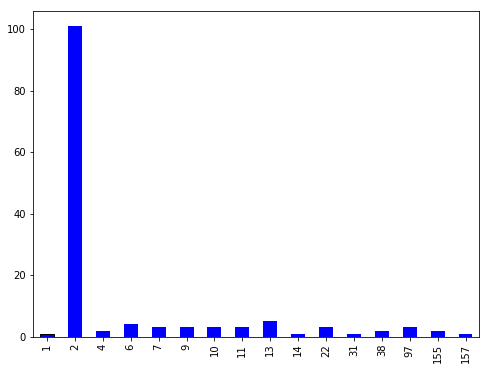

In [30]:
data_int.nunique().value_counts().sort_index().plot.bar(color = 'blue', figsize = (8,6), edgecolor = 'k')

Here we see most of them have 2 labels

In [31]:
data_object = data.select_dtypes(include='object')

In [33]:
data_object.head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


#### ID
    idhogar = Household level identifier
    dependency = No of member below 19 years of age
    edjefe = years of education of male head of household
    edjefa = years of education of female head of household

In [34]:
data_float = data.select_dtypes('float')

In [35]:
data_float.head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [36]:
## 8 of the coulmns are of float type

In [37]:
## change the object columns , replace them with yes or no

In [38]:
test = pd.read_csv('test.csv')

In [39]:
mapping = {'yes': 1, 'no': 0}

## apply same operation on both train and test

for df in [data, test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float)

In [43]:
data[['dependency','edjefe', 'edjefa']].head()

,dependency,edjefe,edjefa
0,0.0,10.0,0.0
1,8.0,12.0,0.0
2,8.0,0.0,11.0
3,1.0,11.0,0.0
4,1.0,11.0,0.0


In [44]:
data[['dependency','edjefe', 'edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


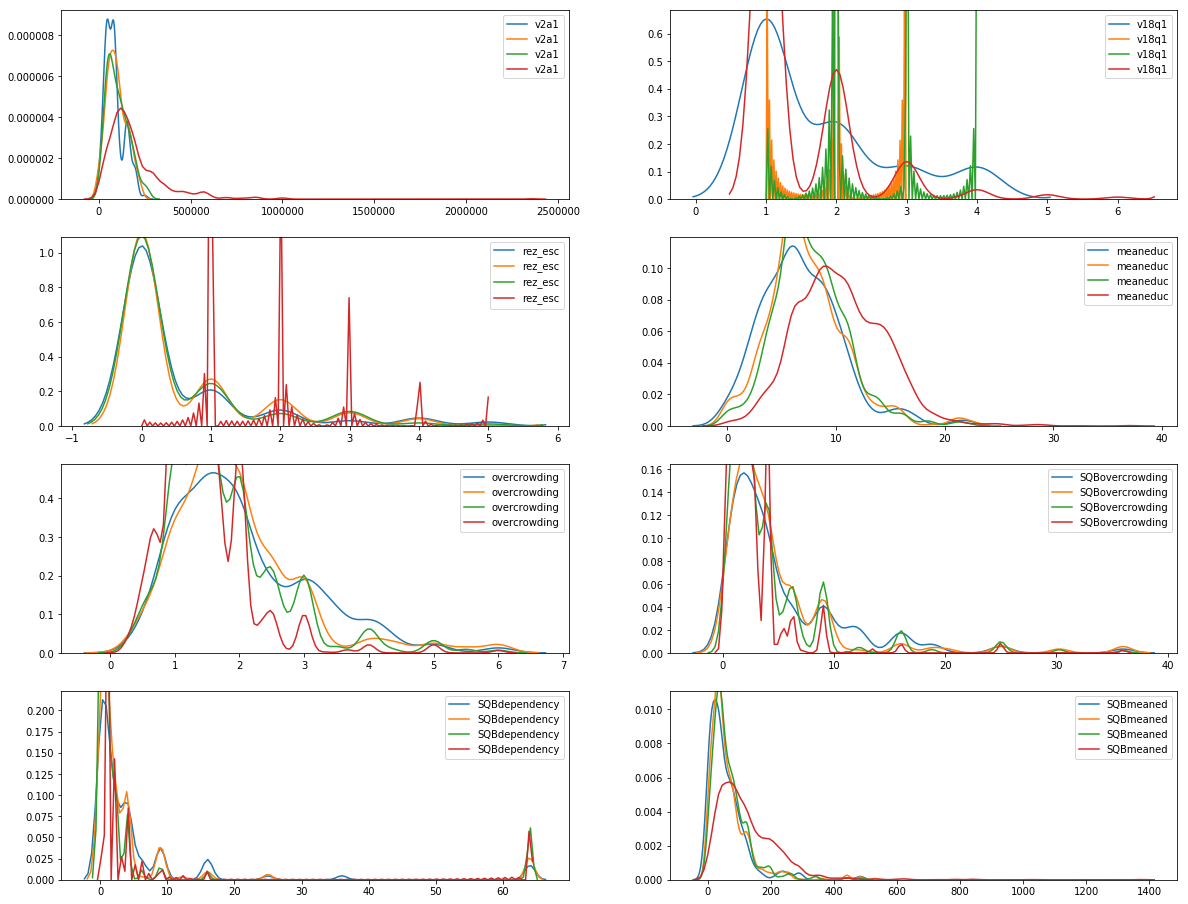

In [47]:
## plot them in graph

from collections import OrderedDict

plt.figure(figsize= (20,16))

## color mapping 
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme poverty', 2: 'moderate poverty',
                               3: 'vulnerable households', 4:'non vulnerable households'})

## Iterate through the float column

for i, col in enumerate(data_float):
    ax = plt.subplot(4,2, i+1)
    # Iterate through poverty levels
    for poverty_levels, color in colors.items():
        sns.kdeplot(data.loc[data['Target'] == poverty_levels, col].dropna())


In [53]:
## Append null target column to test
test['Target'] = np.nan

In [55]:
d = data.append(test, ignore_index = True)

In [56]:
d

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.000000,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.00,100.000000,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.000000,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.00,144.000000,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.000000,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.00,121.000000,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.000000,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.00,121.000000,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.000000,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.00,121.000000,1369,4.0
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.000000,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.00,121.000000,1444,4.0
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.000000,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.00,121.000000,64,4.0
7,ID_3e04e571e,130000.0,1,

In [57]:
## Exploring label distribution

We can get the idea how imbalanced the problem is by looking at distribution of labels

In [69]:
## head of house hold
heads = d.loc[d['parentesco1'] == 1].copy()

In [68]:
d.loc[d['parentesco1'] == 1].head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.0,1444,4.0
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,9,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,1.0,9.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,81,900,16,81,4,16.000000,1.0,100.0,900,4.0


In [73]:
d.loc[(d['Target'].notnull()) & (d['parentesco1'] == 1), ['Target', 'idhogar']].head()

,Target,idhogar
0,4.0,21eb7fcc1
1,4.0,0e5d7a658
2,4.0,2c7317ea8
5,4.0,2b58d945f
8,4.0,d6dae86b7


In [74]:
train_label = d.loc[(d['Target'].notnull()) & (d['parentesco1'] == 1), ['Target', 'idhogar']]

In [76]:
## value count for targets
label_counts = train_label['Target'].value_counts().sort_index()

In [77]:
label_counts

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

([<matplotlib.axis.XTick at 0x1d4f8b6e630>,
 <a list of 4 Text xticklabel objects>)

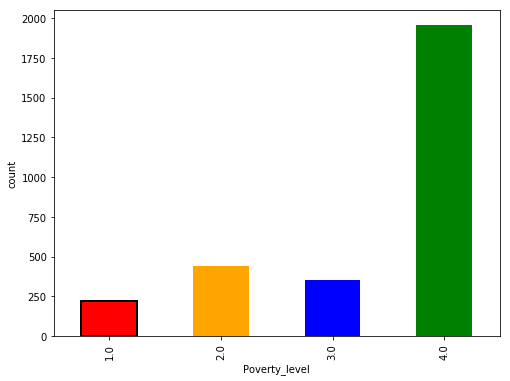

In [79]:
## bar plot occurance of each label
label_counts.plot.bar(figsize = (8,6), 
                     color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

## formatting
plt.xlabel('Poverty_level')
plt.ylabel('count')
plt.xticks([x -1 for x in poverty_mapping.keys()])

In [80]:
## focus on idhoger
data['idhogar'].nunique()

2988

In [81]:
data.shape[0]

9557

In [84]:
data['idhogar'].isnull().sum()

0

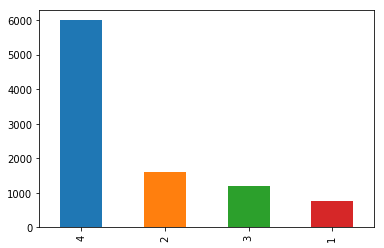

In [86]:
## target label counts
data['Target'].value_counts().plot.bar()

In [124]:
data['idhogar'].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
3fe29a56b    11
6b35cdcf0    11
4476ccd4c    11
b7a0b59d7    11
f2a4cd356    10
6a96a96c0    10
63f11d6ea    10
7cad2d6c4    10
0fc6c05f7    10
a18c0c0be    10
322cefd2f     9
9d70c1551     9
d43a04997     9
d4e1dc02c     9
9fd143d1f     9
06ca88023     9
efec7e82c     9
1ed926340     9
ae489f548     9
476b3f2ee     9
da2ecdcfd     8
dce01dcc3     8
4f2bd02b9     8
2f8fab5de     8
1c0b1cbd8     8
a2f99b6bc     8
493f97dcb     8
             ..
4f6b5a04b     1
8230d4e9c     1
b594dc788     1
49e6d3b5c     1
88886b27d     1
0de07ca9a     1
efe685865     1
c76ee8ff9     1
faa3a287f     1
235cbd214     1
13fd503f9     1
dbf6c8d47     1
19a9cacc3     1
61c10e099     1
0a3be8b29     1
aa2948d67     1
da52ab62c     1
d3643ece8     1
9d05282ce     1
424acc2cf     1
873c41141     1
dcb882984     1
7fc5dc154     1
1f0bfdefe     1
7534b04c6     1
99411766c     1
39f697073     1
90f8190c9     1
7c014f3e7     1
fdb188780     1
Name: idhogar, Length: 2

In [89]:
## There are many unique valuse in the
## there are many errors in this value, lets find the error so that we can correct them

In [98]:
## Group by household and figureout the no. of unique values
all_equal = data.groupby('idhogar')['Target'].apply(lambda x: x.unique() == 1 )

In [100]:
len(all_equal)

2988

In [135]:
all_equal = data.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

In [136]:
len(all_equal)

2988

In [137]:
data.shape[0]

9557

In [142]:
## lets look at one example
data[data['idhogar'] == all_equal.index[0]]  [['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7471,001ff74ca,0,4
7472,001ff74ca,1,4


In [146]:
test_data = data[['idhogar', 'Target']]

In [148]:
test_data.Target.unique()

array([4, 2, 3, 1], dtype=int64)

In [150]:
len(test_data.idhogar.unique())

2988

In [153]:
test_data[test_data.Target == 1]

755

In [157]:
test_data['Target'].nunique() == 1

False

In [158]:
target_1 = test_data[test_data.Target == 1]

In [159]:
target_2 = test_data[test_data.Target == 2]
target_3 = test_data[test_data.Target == 3]
target_4 = test_data[test_data.Target == 4]

In [163]:
len(target_1.groupby('idhogar')['Target'].mean())

242

In [164]:
len(target_2.groupby('idhogar')['Target'].mean())

487

In [165]:
len(target_3.groupby('idhogar')['Target'].mean())

387

In [166]:
len(target_4.groupby('idhogar')['Target'].mean())

1958

In [167]:
## 3074
## 9557
## 6483 are errorous

In [168]:
## we must find data which have : -- same household number but different target value

In [169]:
## Families without head of household

In [176]:
data['parentesco1'].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [175]:
data.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [183]:
household_lead = data.groupby('idhogar')['parentesco1'].sum()

In [186]:
household_lead.max()

1

In [185]:
## Find Household without a head

In [187]:
household_no_head = data.loc[data['idhogar'].isin(household_lead[household_lead == 0].index), :]

In [192]:
household_no_head[['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
4935,09b195e7a,0,3
4975,896fe6d3e,0,3
5391,61c10e099,0,3
5396,374ca5a19,0,3
6443,bfd5067c2,0,3
6444,bfd5067c2,0,3
7086,1367ab31d,0,3
7438,6b1b2405f,0,4
7439,6b1b2405f,0,4
7440,6b1b2405f,0,4


In [194]:
household_no_head['idhogar'].nunique()

15

In [195]:
## There are 15 household without a head

In [197]:
[col for col in data.columns if data[col].isnull().sum() >0]

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [199]:
data['v18q1'].value_counts(dropna = False)

NaN     7342
 1.0    1586
 2.0     444
 3.0     129
 4.0      37
 5.0      13
 6.0       6
Name: v18q1, dtype: int64

In [200]:
data['v18q'].value_counts(dropna = False)

0    7342
1    2215
Name: v18q, dtype: int64

In [201]:
## there are 7342 house holds that dont have a taablet

In [202]:
data.groupby('v18q')['v18q1'].apply(lambda x:x.isnull().sum())

v18q
0    7342
1       0
Name: v18q1, dtype: int64

In [204]:
## Fill 0 wherever there is na
data['v18q1'] = data['v18q1'].fillna(0)

In [205]:
data['v18q1'].value_counts(dropna = False)

0.0    7342
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [208]:
## Next missing column is v2a1
data['v2a1'].value_counts(dropna = False).sort_values(ascending = False).head(10)

NaN          6860
 150000.0     233
 100000.0     181
 200000.0     159
 120000.0     149
 50000.0      118
 80000.0      104
 90000.0       81
 70000.0       79
 180000.0      77
Name: v2a1, dtype: int64

In [210]:
## how many houses are owned
owner_variables = [x for x in data if x.startswith('tipo')]

In [211]:
owner_variables

['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']

In [213]:
## plot the home ownership for home missing rent payment

## create a dataset with missing values of rent and coulmns with owner variables

In [216]:
missingRent_ownerCols = data.loc[data['v2a1'].isnull() , owner_variables ]

([<matplotlib.axis.XTick at 0x1d48106c9b0>,
 <a list of 5 Text xticklabel objects>)

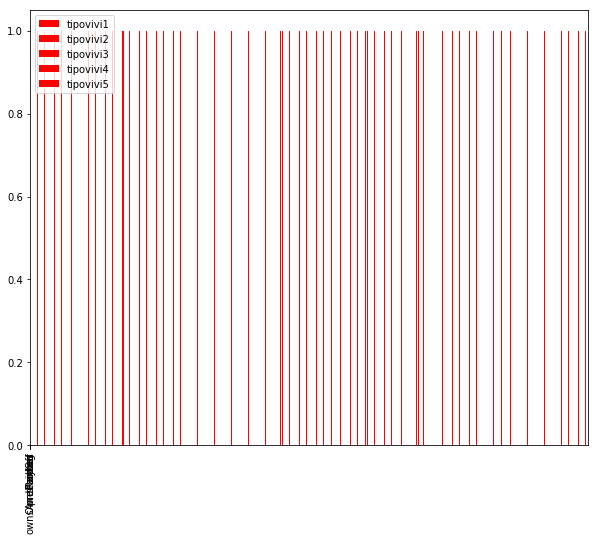

In [218]:
data.loc[data['v2a1'].isnull() , owner_variables ].plot.bar(figsize = (10,8),
                                                           color = 'red',
                                                            linewidth = 2);
plt.xticks([0,1,2,3,4],
          ['ownsAndPaidOff', 'OwnsPaying', 'Rented', 'precarious', 'other'])

In [219]:
data['tipovivi1'].value_counts()

1    5911
0    3646
Name: tipovivi1, dtype: int64

In [228]:
data.loc[data['v2a1'].isnull(), 'tipovivi1'].value_counts(dropna = False)

1    5911
0     949
Name: tipovivi1, dtype: int64

In [235]:
#data.loc[(data['tipovivi1'] == 1), 'v2a1'] == 0

In [237]:
## create a missing column

data.loc[(data['tipovivi1'] == 1), 'v2a1'] == 0
data['v2a1_missing'] = data['v2a1'].isnull()
data['v2a1_missing'].value_counts()

True     6860
False    2697
Name: v2a1_missing, dtype: int64

rez_esc: years behind in school

The last column with a high percentage of missing values is rez_esc indicating years behind in school

In [242]:
## Families with no children
data['rez_esc'].isnull().sum()

7928

In [244]:
data['rez_esc'].value_counts(dropna = False)

NaN     7928
 0.0    1211
 1.0     227
 2.0      98
 3.0      55
 4.0      29
 5.0       9
Name: rez_esc, dtype: int64

0 years behind in school is 1211
1 year behind school is 227
NaN = 7928

In [247]:
data.loc[data['rez_esc'].notnull() ]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [248]:
data.loc[data['rez_esc'].isnull() ]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [249]:
### If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age']< 7)) & (data['rez_esc'].isnull()), 'rez_esc' ] = 0

In [250]:
data['rez_esc'].value_counts(dropna = False)

 0.0    8789
NaN      350
 1.0     227
 2.0      98
 3.0      55
 4.0      29
 5.0       9
Name: rez_esc, dtype: int64

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


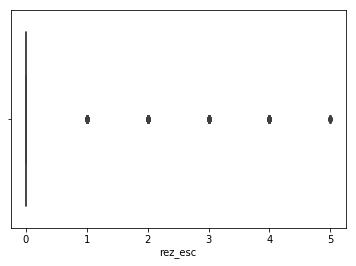

In [251]:
## there are 350 missing value
sns.boxplot(data['rez_esc'])

In [256]:
#sns.boxplot(data[(data['rez_esc'] == 1)],data['Target'])

# Feature Engineering

    The process is as follows

    1.Break variables into household level and invididual level
    2.Find suitable aggregations for the individual level data
        -a.Ordinal variables can use statistical aggregations
        -b.Boolean variables can also be aggregated but with fewer stats
    3.Join the individual aggregations to the household level data

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


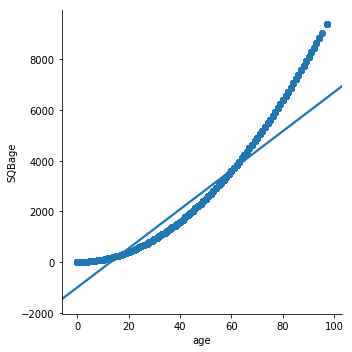

In [257]:
sns.lmplot('age', 'SQBage', data = data, fit_reg= True)

In [258]:
## There are different type of variables
## 4 columns of electricity are there
## 1 = noelec, coopele....



In [260]:
ele = []

## Assign values
for i, row in data.iterrows():
    if row['noelec'] == 1:
        ele.append(0)
    elif row['coopele'] == 1:
        ele.append(1)
    elif row['public'] == 1:
        ele.append(2)
    elif row['planpri'] == 1:
        ele.append(3)
    else:
        ele.append(np.nan)


    
    

In [264]:
type(ele)

list

In [265]:
data['ele'] = ele

In [266]:
data['ele_missing'] = data['ele'].isnull()

In [267]:
data['ele_missing'].value_counts(dropna = False)

False    9542
True       15
Name: ele_missing, dtype: int64

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


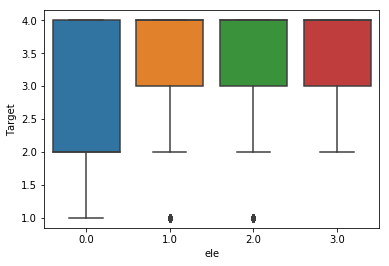

In [268]:
## relationship between ele and Target

sns.boxplot('ele', 'Target', data = data)

## Creating ordinal variable

In [269]:
## Wall, roof and floor
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis = 1)

In [271]:
type(heads['walls'])

pandas.core.series.Series

In [277]:
data['epared3'].max()

1

In [285]:
np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']].head()), axis = 1)

array([1, 1, 1, 2, 0], dtype=int64)

In [287]:
heads[['epared1', 'epared2', 'epared3']].head()

,epared1,epared2,epared3
0,0,1,0
1,0,1,0
2,0,1,0
5,0,0,1
8,1,0,0


## Similarly create categorical series of Roof and floor

In [290]:
heads['roofs'] = np.argmax(np.array(heads[['etecho1','etecho2','etecho3']]), axis = 1)

In [291]:
heads['floor'] = np.argmax(np.array(heads[['eviv1','eviv2','eviv3']]), axis = 1)

In [292]:
heads = heads.drop(columns = ['etecho1','etecho2','etecho3', 'eviv1','eviv2','eviv3','epared1', 'epared2', 'epared3'])

In [294]:
## Now create new features from series
heads['walls+Floor+Roofs'] = heads['walls'] + heads['roofs'] + heads['floor']

In [296]:
heads['walls+Floor+Roofs'].head()

0    1
1    3
2    5
5    6
8    1
Name: walls+Floor+Roofs, dtype: int64

In [301]:
## The lowest poverty level have highest house quality

### The next variable would be about warning - about the house quality

In [ ]:
sanitario1 noelec pisonotiene abastaguano cielorazo==0

In [316]:
heads['warnings'] = (heads['sanitario1'] + heads['pisonotiene'] + heads['abastaguano'] +heads['cielorazo']+
                    (data['ele']==0) + (heads['cielorazo'] == 0))

In [317]:
len(heads['warnings'])

10307

In [318]:
heads[heads['warnings'] < 0]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,walls,roofs,floor,walls+Floor+Roofs,warnings


C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Target vs warning')

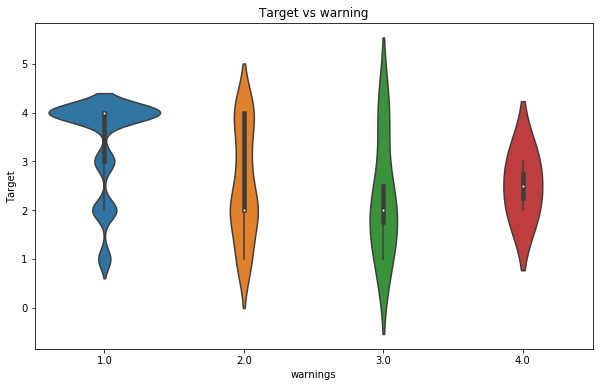

In [319]:
## plot warning verses target
plt.figure(figsize=(10, 6))
sns.violinplot(x = 'warnings', y = 'Target', data = heads);
plt.title('Target vs warning')

## create a feature for accessories
    television =1 if the household has TV
    computer, =1 if the household has notebook or desktop computer
    mobilephone, =1 if mobile phone
    v18q, owns a tablet
    refrig, =1 if the household has refrigerator

In [326]:
## All these values lie between 0 and 1 

In [327]:
heads['bonus'] = heads['television'] + heads['computer'] + heads['mobilephone'] + heads['v18q'] + heads['refrig']

In [329]:
heads['bonus'].head()

0    2
1    3
2    1
5    3
8    2
Name: bonus, dtype: int64

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


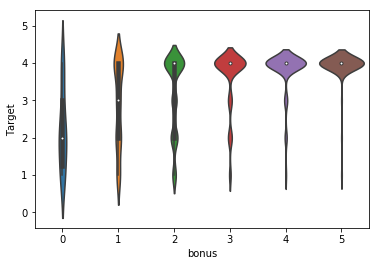

In [330]:
sns.violinplot('bonus', 'Target', data = heads)

In [331]:
## number of accessories Divided by no of persons living in a household

    ## Phones, tablet, rooms, rent
    1.qmobilephone
    2.v18q1, number of tablets household owns
    3.rooms,  number of all rooms in the house
    4.v2a1, Monthly rent payment

In [332]:
## check the spearman correlation
heads_numeric = heads.select_dtypes(exclude='object')

In [333]:
from scipy.stats import spearmanr

feats = []
scorr = []
pvalue = []

for c in heads.columns:
    scorr.append(spearmanr(heads_numeric[c], heads_numeric['Target']).correlation)
    pvalue.append(spearmanr(heads_numeric[c], heads_numeric['Target'].pvalue))
    
scorrs = pd.DataFrame({'Features': feats, 'scorr': scorr, 'pvalue': pvalue})
    

In [338]:
spearmanr(heads_numeric['v2a1'], heads_numeric['Target']).correlation

nan

In [339]:
heads_numeric.columns

Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target',
       'walls', 'roofs', 'floor', 'walls+Floor+Roofs', 'bonus'],
      dtype='object', length=137)

In [343]:
spearmanr(heads_numeric['walls+Floor+Roofs'], heads_numeric['Target']).correlation

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\mstats_basic.py:484: RuntimeWarning: overflow encountered in long_scalars
  denom = n*(n**2 - 1)/6.


nan

In [346]:
## calculated the correlations between the correlations
variables = ['Target', 'dependency', 'warnings', 'walls+Floor+Roofs', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

In [349]:
heads[variables].head()

,Target,dependency,warnings,walls+Floor+Roofs,meaneduc,floor,r4m1,overcrowding
0,4.0,0.0,1,1,10.0,0,0,1.000000
1,4.0,8.0,1,3,12.0,1,0,1.000000
2,4.0,8.0,1,5,11.0,2,0,0.500000
5,4.0,1.0,1,6,11.0,2,1,1.333333
8,4.0,1.0,1,1,10.0,1,2,4.000000


In [350]:
corr_mat = heads[variables].corr().round(2)

In [351]:
corr_mat

,Target,dependency,walls+Floor+Roofs,meaneduc,floor,r4m1,overcrowding
Target,1.00,-0.13,0.33,0.33,0.31,-0.21,-0.23
dependency,-0.13,1.00,-0.04,-0.19,-0.03,0.00,-0.11
walls+Floor+Roofs,0.33,-0.04,1.00,0.32,0.88,-0.07,-0.23
meaneduc,0.33,-0.19,0.32,1.00,0.28,-0.02,-0.11
floor,0.31,-0.03,0.88,0.28,1.00,-0.08,-0.23
r4m1,-0.21,0.00,-0.07,-0.02,-0.08,1.00,0.42
overcrowding,-0.23,-0.11,-0.23,-0.11,-0.23,0.42,1.00


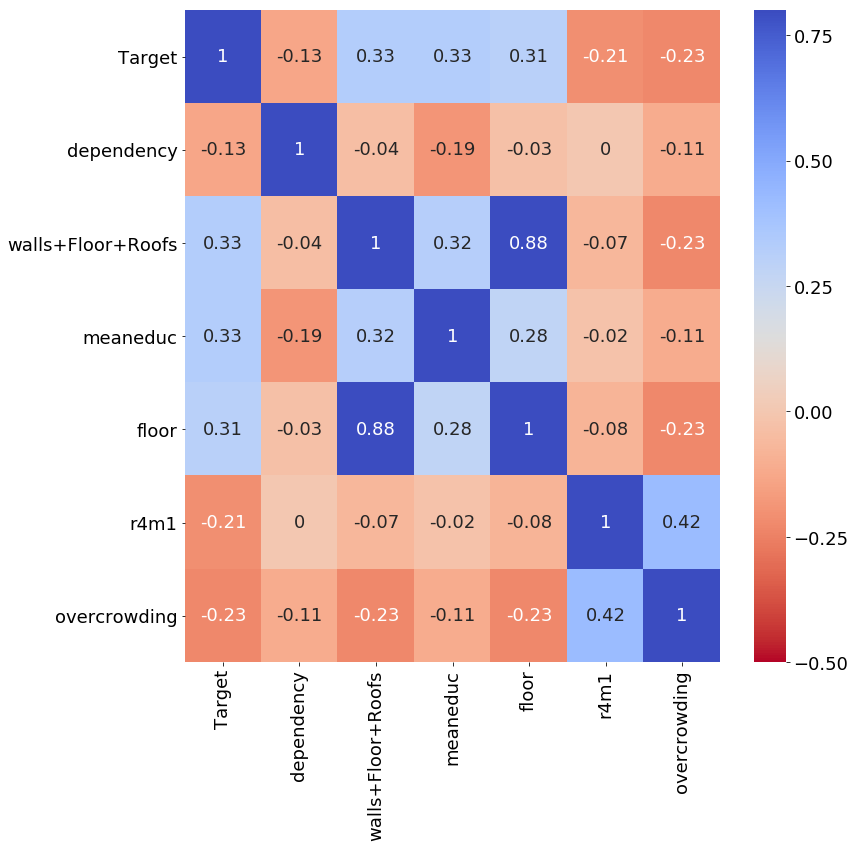

In [353]:
## draw the correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize= (12,12))
sns.heatmap(corr_mat, vmin=-0.5, vmax=0.8 ,annot= True, cmap = 'coolwarm_r')

In [354]:
## creating ordinal variable of inst_... columns
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)


NameError: name 'ind' is not defined

In [356]:
## do final data exploration
## Feature selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import  MinMaxScaler
from sklearn.pipeline import  Pipeline

## customize scorer for crossvalidation
scorer = make_scorer(f1_score, greater_is_better= True, average = 'macro')

In [357]:
## use above for feature selection


In [358]:
## Import models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## create a DF to hold results
model_results = pd.DataFrame(columns= ['model', 'cv', 'cv_std'])

def cv_model(train, train_labels, name, model_results=None):
    
    cv_score = cross_val_score()